Word cloud 는 keywords 를 시각화하여 표현하는 좋은 수단입니다. Python 의 wordcloud package 를 이용하여 KR-WordRank 의 결과를 표현합니다. 

Package, wordcloud 의 사용법은 [여기][wordcloud]를 참고하세요. wordcloud 의 설치는 pip install 이 가능합니다. 

    pip install wordcloud

KR-WordRank 에 관련한 내용과 사용의 자세한 설명은 이 [튜토리얼][krwordrank_tutorial]을 참고하세요. 

[wordcloud]: https://github.com/amueller/word_cloud
[krwordrank_tutorial]: https://github.com/lovit/KR-WordRank/blob/master/tutorials/krwordrank_word_and_keyword_extraction.ipynb

In [1]:
# load sample data

def get_texts_scores(fname):
    with open(fname, encoding='utf-8') as f:
        docs = [doc.lower().replace('\n','').split('\t') for doc in f]
        docs = [doc for doc in docs if len(doc) == 2]
        
        if not docs:
            return [], []
        
        texts, scores = zip(*docs)
        return list(texts), list(scores)

# La La Land
fname = '../data/134963.txt'
texts, scores = get_texts_scores(fname)

In [2]:
import sys
sys.path.append('../')

from krwordrank.word import KRWordRank
import krwordrank
print(krwordrank.__version__)

0.1.3


In [3]:
# train KR-WordRank model

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 15964
done = 10 Early stopped.


In [4]:
# Check top 30 keywords with corresponding score

for word, r in sorted(keywords.items(), key=lambda x:-x[1])[:30]:
    print('%8s:\t%.4f' % (word, r))

      영화:	199.1862
     관람객:	110.5949
      너무:	89.4191
      정말:	42.3327
     마지막:	38.0814
      음악:	34.7721
     최고의:	22.3263
      보고:	22.1350
     뮤지컬:	22.0085
     여운이:	21.4165
      진짜:	21.3930
      꿈을:	21.3883
      사랑:	19.4885
      아름:	18.8450
      좋았:	18.8231
      좋은:	17.9560
      영상:	16.8227
      노래:	16.1577
      그냥:	15.7549
     스토리:	15.5779
      생각:	14.8758
      현실:	14.7699
      다시:	14.7597
      인생:	14.6162
      좋고:	14.0481
      지루:	13.8212
      보는:	13.3998
      계속:	12.7141
      좋아:	12.5200
      많이:	12.3452


In [5]:
# remove stopwords

stopwords = {'영화', '관람객', '너무', '정말', '보고'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

print('num passwords = {}'.format(len(passwords)))

num passwords = 295


In [6]:
# draw word cloud using generate_from_frequencies()
# You should set font path for Korean.

from wordcloud import WordCloud

# Set your font path
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

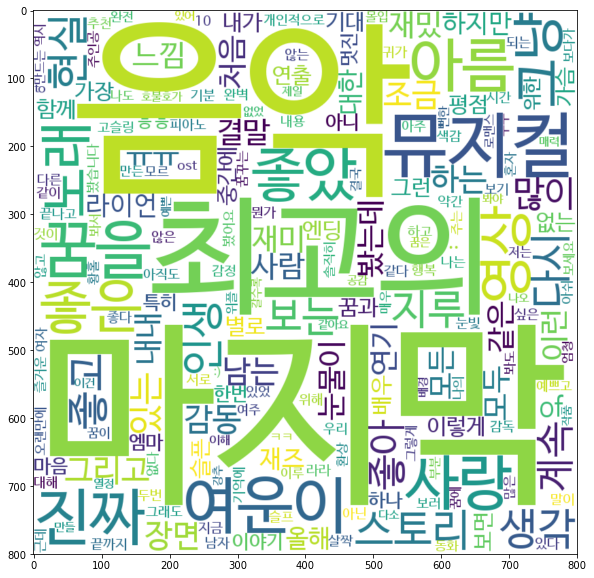

In [7]:
# show figure using matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [8]:
# save figure

fig.savefig('./lalaland_wordcloud.png')